In [1]:
from PandasMagClass import MicrosoftAcademicGraph
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [2]:
root = './data/'
mag = MicrosoftAcademicGraph(root)

In [3]:
# load MAG data: Papers
df_papers = mag.get_data_frame('Papers')
df_papers.head(3)

,PaperId,Rank,Doi,DocType,PaperTitle,OriginalTitle,BookTitle,Year,Date,OnlineDate,...,Volume,Issue,FirstPage,LastPage,ReferenceCount,CitationCount,EstimatedCitation,OriginalVenue,FamilyId,CreatedDate
0,342037,22085,10.1533/9781845694586.3.194,NaN,detecting virus contamination in seafood,Detecting virus contamination in seafood.,NaN,2008,2008-01-01 12:00:00,NaT,...,NaN,NaN,194,211,105,1,1,Improving Seafood Products for the Consumer,NaN,2016-06-24 12:00:00
1,392414,25423,10.1007/978-88-470-0556-3_60,NaN,il lavaggio broncoalveolare bal in eta pediatrica,Il lavaggio broncoalveolare (BAL) in età pedia...,NaN,2007,2007-01-01 12:00:00,NaT,...,NaN,NaN,621,634,35,0,0,NaN,NaN,2016-06-24 12:00:00
2,442880,24185,10.1007/978-1-4684-5823-7_2,Journal,background paper functions of coronavirus glyc...,Background paper: functions of coronavirus gly...,NaN,1990,1990-01-01 12:00:00,NaT,...,276,NaN,5,7,1,4,4,Advances in Experimental Medicine and Biology,NaN,2016-06-24 12:00:00


In [4]:
# load MAG data: Paper Author Affiliations
df_paper_author_affiliations = mag.get_data_frame('PaperAuthorAffiliations')
df_paper_author_affiliations.head(3)

,PaperId,AuthorId,AffiliationId,AuthorSequenceNumber,OriginalAuthor,OriginalAffiliation
0,342037,2110117508,NaN,7,F. S. le Guyader,NaN
1,342037,2135466750,71999127,2,R. M. Pintó,"University of Barcelona, (Spain)"
2,342037,2149630968,71999127,1,A. Bosch,"University of Barcelona, (Spain)"


In [5]:
# load MAG data: FieldOfStudy
df_fos = mag.get_data_frame('FieldsOfStudy')
df_fos.head(3)

,FieldOfStudyId,Rank,NormalizedName,DisplayName,MainType,Level,PaperCount,PaperFamilyCount,CitationCount,CreatedDate
0,12843,11873,gravitational singularity,Gravitational singularity,NaN,2,38572,36517,498012,2016-06-24 12:00:00
1,20288,11771,superstring theory,Superstring theory,NaN,3,7425,6989,196930,2016-06-24 12:00:00
2,40700,9651,industrial organization,Industrial organization,NaN,1,320951,319290,2659089,2016-06-24 12:00:00


In [6]:
# load MAG data: Paper Field Of Study
df_paper_fos = mag.get_data_frame('PaperFieldsOfStudy')
df_paper_fos.head(3)

,PaperId,FieldOfStudyId,Score
0,342037,31903555,0.368951
1,342037,34135077,0.548833
2,342037,86803240,0.364040


In [7]:
# load MAG data: Journals
df_journals = mag.get_data_frame('Journals')
df_journals.head(3)

,JournalId,Rank,NormalizedName,DisplayName,Issn,Publisher,Webpage,PaperCount,PaperFamilyCount,CitationCount,CreatedDate
0,61661,10724,journal of prosthodontics,Journal of Prosthodontics,1059-941X,NaN,NaN,2759,2759,26991,2016-06-24 12:00:00
1,255146,9259,synthese,Synthese,0039-7857,NaN,http://www.springer.com/11229,7074,7074,76660,2016-06-24 12:00:00
2,260102,12335,bmc emergency medicine,BMC Emergency Medicine,1471-227X,NaN,NaN,556,556,5457,2016-06-24 12:00:00


In [8]:
# load MAG data: Affiliations
df_affiliations = mag.get_data_frame('Affiliations')
df_affiliations.head(3)

,AffiliationId,Rank,NormalizedName,DisplayName,GridId,OfficialPage,WikiPage,PaperCount,PaperFamilyCount,CitationCount,Latitude,Longitude,CreatedDate
0,9507,11625,sangji university,Sangji University,grid.412417.5,http://www.sangji.ac.kr/,http://en.wikipedia.org/wiki/Sangji_University,1479,1469,13387,37.369946,127.928612,2016-06-24 12:00:00
1,15855,12646,manchester institute of innovation research,Manchester Institute of Innovation Research,NaN,NaN,http://en.wikipedia.org/wiki/Manchester_Instit...,364,356,9278,53.467999,-2.236000,2016-06-24 12:00:00
2,19722,11477,ateneo de manila university,Ateneo de Manila University,grid.443223.0,http://www.ateneo.edu/,http://en.wikipedia.org/wiki/Ateneo_de_Manila_...,1877,1864,10674,14.638890,121.077782,2016-06-24 12:00:00


In [9]:
# top K journals

# - papers with journals
paper_with_journals = df_papers[df_papers['JournalId'].notnull()]

# - join journals to get journal name
paper_journals = pd.merge(paper_with_journals, df_journals, on ='JournalId', how = 'inner')[['JournalId', 'NormalizedName', 'PaperId']]

# - group by journals and count papers
journals_stats = paper_journals.groupby(['JournalId', 'NormalizedName']).size().to_frame('PaperCount').reset_index().sort_values(by=['PaperCount'], ascending=False)

# - get top 10 journals
journals_stats_top_10 = journals_stats.nlargest(10, 'PaperCount')[['NormalizedName', 'PaperCount']]

journals_stats_top_10

,NormalizedName,PaperCount
7378,medrxiv,3681
5383,plos one,1977
2525,journal of virology,1664
5828,biorxiv,1348
5046,emerging infectious diseases,1007
1250,surgical endoscopy and other interventional te...,909
174,virology,882
5243,scientific reports,871
5140,bmj,786
1324,the lancet,749


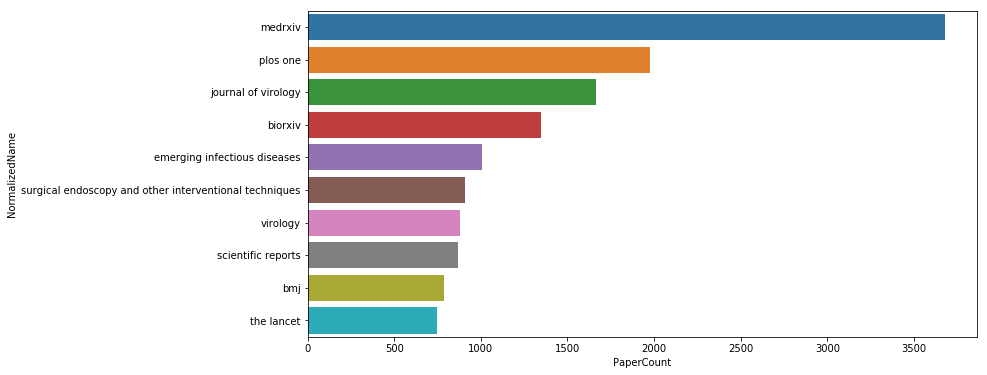

In [10]:
# top K journals: figure
plt.figure(figsize=(12, 6))
ax_topk_journals = plt.subplot()
ax_topk_journals = sns.barplot(x="PaperCount", y="NormalizedName", data=journals_stats_top_10)
plt.show()

In [11]:
# team size average

# - group by paperId to get team size for each paper
paper_team_size = df_paper_author_affiliations.groupby(['PaperId']).size().to_frame('TeamSize').reset_index()

# - get average team size for all papers
paper_team_size_avg = paper_team_size['TeamSize'].mean()

paper_team_size_avg

6.155347014184458

In [12]:
# team size distribution

# - generate paper count per team size 
team_size_distribution = paper_team_size.groupby(['TeamSize']).size().to_frame('PaperCount').reset_index()

# - set team size intervals
#bins = [0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 5465]
bins = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 5465]

# - generate paper count per team size intervals
team_size_range = paper_team_size.groupby(pd.cut(paper_team_size['TeamSize'], bins=bins)).size().to_frame('PaperCount').reset_index()

team_size_range

,TeamSize,PaperCount
0,"(0, 2]",29792
1,"(2, 4]",27138
2,"(4, 6]",21485
3,"(6, 8]",14402
4,"(8, 10]",8910
5,"(10, 12]",5120
6,"(12, 14]",2988
7,"(14, 16]",1774
8,"(16, 18]",1152
9,"(18, 20]",775


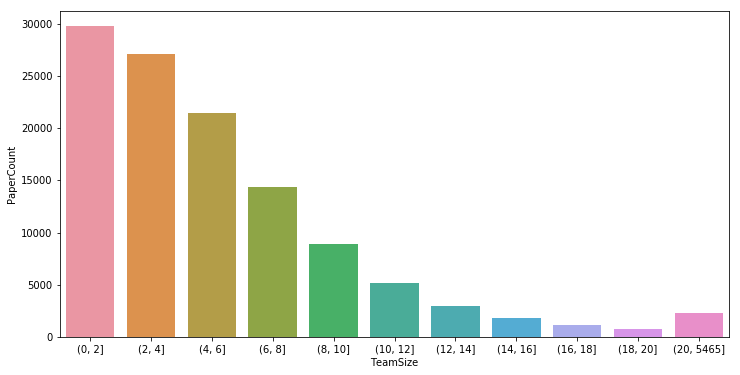

In [13]:
# team size distribution: figure
plt.figure(figsize=(12, 6))
ax_team_size_distribution = plt.subplot()
ax_team_size_distribution = sns.barplot(x="TeamSize", y="PaperCount", data=team_size_range)
plt.show()

In [14]:
# top K geolocation by past 20 year: load data
df_affiliation_regions = pd.read_table('./AffiliationRegions.txt', low_memory=False, names=('AffiliationId', 'Name', 'Region'))
df_affiliation_regions.head(3)

/home/v-lima2/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


,AffiliationId,Name,Region
0,721619,Benemérita Universidad Autónoma de Puebla,Mexico
1,6615443,Hydro One,Canada
2,8086503,Sir Salimullah Medical College,Bangladesh


In [15]:
# top K geolocation by past 20 year

# - filter papers publish year
papers = df_papers[(df_papers.Year >= 2000) & (df_papers.Year <= 2019)]

# - join papers with paper author affiliation
papers_with_affi = pd.merge(papers, df_paper_author_affiliations, on ='PaperId', how = 'inner')[['PaperId', 'Year', 'AffiliationId']]

# - keep only non-empty and distinct rows
papers_with_affi_distinct = papers_with_affi[papers_with_affi['AffiliationId'].notnull()].drop_duplicates()

# - join to get affiliation region
papers_affi_region = pd.merge(df_affiliation_regions, papers_with_affi_distinct, on ='AffiliationId', how = 'inner')[['PaperId', 'Year', 'AffiliationId', 'Region']]

# - eliminate double count when authors in one paper are from different affiliations but in the same country
papers_year_region = papers_affi_region.groupby(['PaperId', 'Year', 'Region']).size().reset_index()[['PaperId', 'Year', 'Region']]

# - group to get paper count per region and year
region_year_papercount = papers_year_region.groupby(['Region', 'Year']).size().to_frame('PaperCount').reset_index().sort_values(by=['PaperCount'], ascending=False)

# - get paper count per region
region_papercount = region_year_papercount.groupby(['Region'])['PaperCount'].sum().reset_index()

# - get region top paper count
top_region_papercount = region_papercount.nlargest(5, 'PaperCount')['Region'].tolist()

# - filter top countries on papers count per year and country
top_region_year_papercount = region_year_papercount[region_year_papercount['Region'].isin(set(top_region_papercount))]

top_region_year_papercount.head(10)

,Region,Year,PaperCount
956,United States,2017,2355
954,United States,2015,2340
955,United States,2016,2229
953,United States,2014,2107
958,United States,2019,2044
957,United States,2018,1994
952,United States,2013,1870
254,EU,2019,1806
252,EU,2017,1733
250,EU,2015,1704


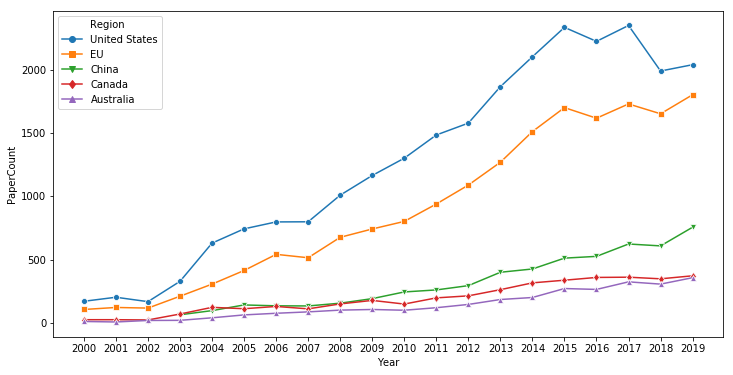

In [29]:
# top K geolocation by past 20 year: figure
plt.figure(figsize=(12, 6))
ax_topk_geolocation = plt.subplot()
ax_topk_geolocation = sns.lineplot(x="Year", y="PaperCount", hue="Region", style="Region", markers=['o','s','v','d', '^'], hue_order=top_region_papercount, dashes=False, data=top_region_year_papercount)
ax_topk_geolocation.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}'.format(x)))
ax_topk_geolocation.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.show()

In [17]:
# L0 top Field Of Study distribution
L0_TopN = 5

L0_fos = df_fos.loc[df_fos['Level'] == 0]
paper_L0_fos = pd.merge(L0_fos, df_paper_fos, on = 'FieldOfStudyId', how='inner')
L0_fos_stats = paper_L0_fos.groupby('NormalizedName').agg({'PaperId':['count']})
L0_fos_stats.columns = ['PaperCnt']
L0_fos_stats.sort_values(by=['PaperCnt'], inplace = True, ascending=False)
L0_fos_stats_sorted = L0_fos_stats.reset_index()

L0_fos_stats_sorted.loc[L0_fos_stats_sorted.index >= L0_TopN, 'NormalizedName'] = 'others'
L0_fos_stats_topN = L0_fos_stats_sorted.groupby('NormalizedName').agg({'PaperCnt':['sum']})
L0_fos_stats_topN.columns = ['PaperCntSum']
L0_fos_stats_topN.sort_values(by=['PaperCntSum'], inplace = True, ascending=False)
L0_fos_stats_topN = L0_fos_stats_topN.reset_index()
L0_fos_stats_topN['Percentage'] = L0_fos_stats_topN.PaperCntSum / L0_fos_stats_topN.PaperCntSum.sum()
L0_fos_stats_topN['Percentage'] = pd.Series(["{0:.2f}%".format(val * 100) for val in L0_fos_stats_topN['Percentage']], index = L0_fos_stats_topN.index)

L0_fos_stats_topN

,NormalizedName,PaperCntSum,Percentage
0,medicine,63225,54.51%
1,biology,36513,31.48%
2,others,8008,6.90%
3,chemistry,3936,3.39%
4,computer science,2219,1.91%
5,psychology,2078,1.79%


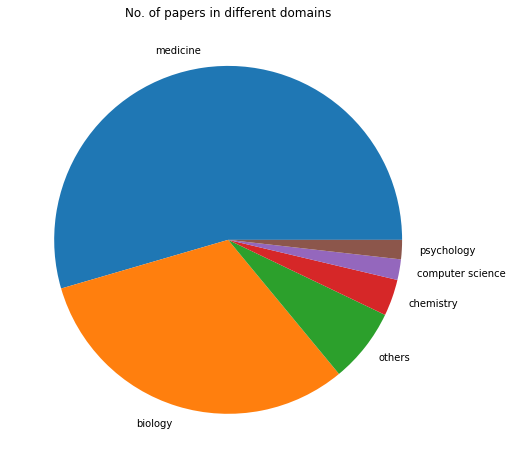

In [18]:
# L0 top Field Of Study distribution : figure
domains = list(L0_fos_stats_topN['NormalizedName'])
PaperCnt_domain = list(L0_fos_stats_topN['PaperCntSum'])
fig = plt.figure(figsize = (15, 8)) 
plt.pie(PaperCnt_domain, labels = domains) 
plt.title("No. of papers in different domains") 
plt.show() 

In [19]:
# L1 top Field Of Study distribution
L1_TopN = 10

L1_fos = df_fos.loc[df_fos['Level'] == 1]
paper_L1_fos = pd.merge(L1_fos, df_paper_fos, on = 'FieldOfStudyId', how='inner')
L1_fos_stats = paper_L1_fos.groupby('NormalizedName').agg({'PaperId':['count']})
L1_fos_stats.columns = ['PaperCnt']
L1_fos_stats.sort_values(by=['PaperCnt'], inplace = True, ascending=False)
L1_fos_stats_sorted = L1_fos_stats.reset_index()

L1_fos_stats_topN1 = L1_fos_stats_sorted.nlargest(L1_TopN, 'PaperCnt')
L1_fos_stats_topN1['Percentage'] = L1_fos_stats_topN1.PaperCnt / L1_fos_stats_topN1.PaperCnt.sum()
L1_fos_stats_topN1['Percentage'] = pd.Series(["{0:.2f}%".format(val * 100) for val in L1_fos_stats_topN1['Percentage']], index = L1_fos_stats_topN1.index)

L1_fos_stats_topN1

,NormalizedName,PaperCnt,Percentage
0,virology,29567,26.28%
1,immunology,15954,14.18%
2,surgery,15667,13.92%
3,internal medicine,12045,10.70%
4,intensive care medicine,10624,9.44%
5,molecular biology,7268,6.46%
6,pathology,6611,5.88%
7,genetics,5231,4.65%
8,general surgery,4963,4.41%
9,anesthesia,4594,4.08%


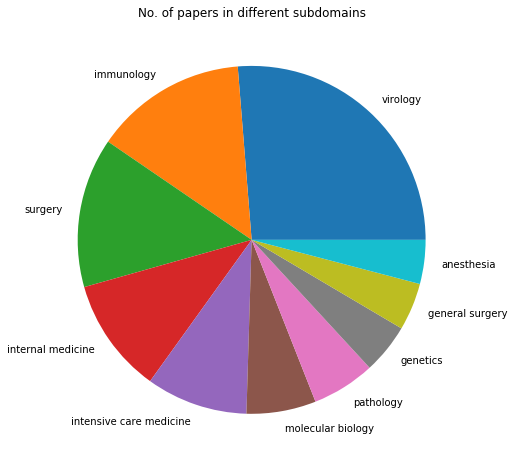

In [20]:
# L1 top Field Of Study distribution : figure
domains = list(L1_fos_stats_topN1['NormalizedName'])
PaperCnt_domain = list(L1_fos_stats_topN1['PaperCnt'])
fig = plt.figure(figsize = (15, 8))
plt.pie(PaperCnt_domain, labels = domains) 
plt.title("No. of papers in different subdomains") 
plt.show() 

In [21]:
# L0 top Field Of Study distribution by year
L0_topN = 5

L0_fos = df_fos.loc[df_fos['Level'] == 0]
paper_L0_fos = pd.merge(L0_fos, df_paper_fos, on = 'FieldOfStudyId', how='inner')[['NormalizedName', 'Level', 'PaperId']]
papers = df_papers[(df_papers.Year >= 2000) & (df_papers.Year <= 2019)]
paper_year_L0_fos = pd.merge(paper_L0_fos, papers, on = 'PaperId', how='inner')[['NormalizedName', 'Level', 'PaperId', 'Year']]
fos_L0_year_papercount = paper_year_L0_fos.groupby(['NormalizedName', 'Year']).size().to_frame('PaperCount').reset_index().sort_values(by=['PaperCount'], ascending=False)

fos_L0_papercount = fos_L0_year_papercount.groupby(['NormalizedName'])['PaperCount'].sum().reset_index()
top_fos_L0_papercount = fos_L0_papercount.nlargest(L0_topN, 'PaperCount')['NormalizedName'].tolist()

fos_L0_year_papercount.loc[~fos_L0_year_papercount['NormalizedName'].isin(set(top_fos_L0_papercount)), 'NormalizedName'] = 'others'
fos_L0_year_topN = fos_L0_year_papercount.groupby(['NormalizedName', 'Year']).agg({'PaperCount':['sum']}).reset_index()
fos_L0_year_topN.columns = ['NormalizedName','Year','PaperCountSum']

fos_L0_year_topN.head(30)

,NormalizedName,Year,PaperCountSum
0,biology,2000,262
1,biology,2001,314
2,biology,2002,243
3,biology,2003,478
4,biology,2004,784
5,biology,2005,942
6,biology,2006,1208
7,biology,2007,1037
8,biology,2008,1233
9,biology,2009,1369


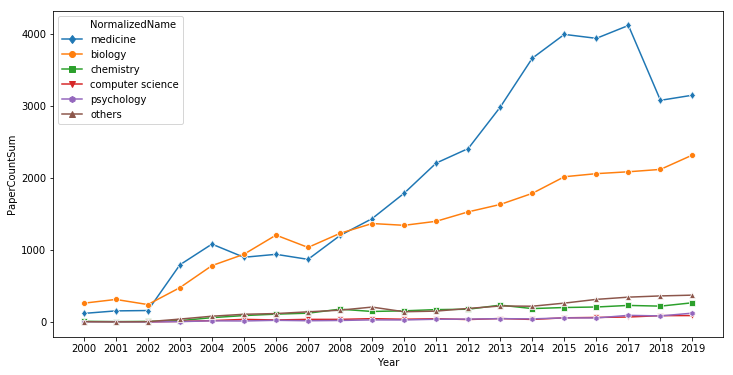

In [30]:
# L0 top Field Of Study distribution by year: figure
plt.figure(figsize=(12, 6))
top_fos_L0_papercount_order = top_fos_L0_papercount.copy()
top_fos_L0_papercount_order.append('others')
ax_topk_fos_L0 = plt.subplot()
ax_topk_fos_L0 = sns.lineplot(x="Year", y="PaperCountSum", hue="NormalizedName", style="NormalizedName", markers=['o','s','v','d', '^', 'h'], hue_order=top_fos_L0_papercount_order, dashes=False, data=fos_L0_year_topN)
ax_topk_fos_L0.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}'.format(x)))
ax_topk_fos_L0.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.show()

In [23]:
# L1 top Field Of Study distribution by year
L1_topN = 10

L1_fos = df_fos.loc[df_fos['Level'] == 1]
paper_L1_fos = pd.merge(L1_fos, df_paper_fos, on = 'FieldOfStudyId', how='inner')[['NormalizedName', 'Level', 'PaperId']]
papers = df_papers[(df_papers.Year >= 2000) & (df_papers.Year <= 2019)]
paper_year_L1_fos = pd.merge(paper_L1_fos, papers, on = 'PaperId', how='inner')[['NormalizedName', 'Level', 'PaperId', 'Year']]
fos_L1_year_papercount = paper_year_L1_fos.groupby(['NormalizedName', 'Year']).size().to_frame('PaperCount').reset_index().sort_values(by=['PaperCount'], ascending=False)

fos_L1_papercount = fos_L1_year_papercount.groupby(['NormalizedName'])['PaperCount'].sum().reset_index()
top_fos_L1_papercount = fos_L1_papercount.nlargest(L1_topN, 'PaperCount')['NormalizedName'].tolist()
top_fos_L1_year_papercount = fos_L1_year_papercount[fos_L1_year_papercount['NormalizedName'].isin(set(top_fos_L1_papercount))]

top_fos_L1_year_papercount.head(3)

,NormalizedName,Year,PaperCount
3282,surgery,2015,1734
3456,virology,2016,1671
3455,virology,2015,1636


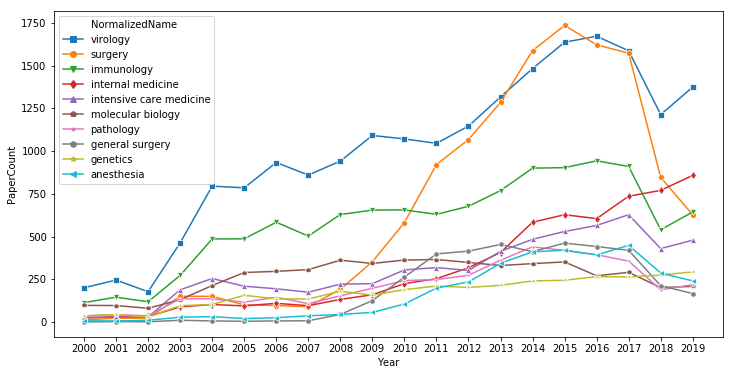

In [31]:
# L1 top Field Of Study distribution by year: figure
plt.figure(figsize=(12, 6))
ax_topk_fos_L1 = plt.subplot()
ax_topk_fos_L1 = sns.lineplot(x="Year", y="PaperCount", hue="NormalizedName", style="NormalizedName", markers=['o','s','v','d','^','h','<','.','p','*'], hue_order=top_fos_L1_papercount, dashes=False, data=top_fos_L1_year_papercount)
ax_topk_fos_L1.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}'.format(x)))
ax_topk_fos_L1.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.show()